In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Master_DSC_Shared_Folder/DSMarket/Data/Otros/dataset_completo.csv')

<ipython-input-6-3060da5aabf3>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Master_DSC_Shared_Folder/DSMarket/Data/Otros/dataset_completo.csv')


In [ ]:
df

,Unnamed: 0,id,item,category,department,store,store_code,region,d,daily_sales,date,weekday,weekday_int,event,year,month,day,yearweek,sell_price
0,0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
1,1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
2,2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
3,3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
4,4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,NaN,2011,1,29,201105.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58327365,58327365,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1,2016-04-24,Sunday,2,NaN,2016,4,24,201617.0,3.576
58327366,58327366,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0,2016-04-24,Sunday,2,NaN,2016,4,24,201617.0,2.976
58327367,58327367,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0,2016-04-24,Sunday,2,NaN,2016,4,24,201617.0,4.776
58327368,58327368,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,3,2016-04-24,Sunday,2,NaN,2016,4,24,201617.0,1.536


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   id           object 
 2   item         object 
 3   category     object 
 4   department   object 
 5   store        object 
 6   store_code   object 
 7   region       object 
 8   d            object 
 9   daily_sales  int64  
 10  date         object 
 11  weekday      object 
 12  weekday_int  int64  
 13  event        object 
 14  year         int64  
 15  month        int64  
 16  day          int64  
 17  yearweek     float64
 18  sell_price   float64
dtypes: float64(2), int64(6), object(11)
memory usage: 8.3+ GB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df_5_years = df[df['year'].isin(range(2012,2016))]

In [ ]:
df_5_years

,Unnamed: 0,id,item,category,department,store,store_code,region,d,daily_sales,date,weekday,weekday_int,event,year,month,day,yearweek,sell_price
10275130,10275130,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_338,0,2012-01-01,Sunday,2,NewYear,2012,1,1,201201.0,NaN
10275131,10275131,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_338,0,2012-01-01,Sunday,2,NewYear,2012,1,1,201201.0,5.2801
10275132,10275132,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_338,0,2012-01-01,Sunday,2,NewYear,2012,1,1,201201.0,NaN
10275133,10275133,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_338,0,2012-01-01,Sunday,2,NewYear,2012,1,1,201201.0,5.7722
10275134,10275134,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_338,1,2012-01-01,Sunday,2,NewYear,2012,1,1,201201.0,3.2984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54821015,54821015,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1798,1,2015-12-31,Thursday,6,NaN,2015,12,31,201552.0,3.0000
54821016,54821016,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1798,0,2015-12-31,Thursday,6,NaN,2015,12,31,201552.0,2.4000
54821017,54821017,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1798,1,2015-12-31,Thursday,6,NaN,2015,12,31,201552.0,4.7760
54821018,54821018,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1798,0,2015-12-31,Thursday,6,NaN,2015,12,31,201552.0,1.5360


In [ ]:
# 1. Tendencias Temporales
# Calcular las ventas anuales y el crecimiento interanual
ventas_anuales = df_5_years.groupby(['store', 'year'])['daily_sales'].sum().unstack().fillna(0)
crecimiento_interanual = ventas_anuales.pct_change(axis=1).fillna(0) * 100

# Mostrar las ventas anuales y el crecimiento interanual
print("Ventas anuales:")
print(ventas_anuales)
print("\nCrecimiento interanual:")
print(crecimiento_interanual)

Ventas anuales:
year                  2012     2013     2014     2015
store                                                
Back_Bay           1087198  1136181  1235871  1342873
Brooklyn            729865   824096   846176   875101
Greenwich_Village  1406432  1538540  1577931  1606863
Harlem             1032484  1121532  1010213  1208421
Midtown_Village     725388  1021094  1153819  1274924
Queen_Village      1437700  1201309  1053456  1192198
Roxbury            1460222  1536308  1331780  1364799
South_End          1064111  1105570  1105564  1151251
Tribeca            2099706  2249633  2314556  2276753
Yorktown           1018731  1401490  1460410  1507628

Crecimiento interanual:
year               2012       2013       2014       2015
store                                                   
Back_Bay            0.0   4.505435   8.774130   8.658023
Brooklyn            0.0  12.910744   2.679299   3.418320
Greenwich_Village   0.0   9.393131   2.560284   1.833540
Harlem              0.0   

In [ ]:
# 2. Comportamiento en Eventos
# Filtrar eventos únicos sin NaN
eventos = df_5_years['event'].dropna().unique()
ventas_eventos = df_5_years[df_5_years['event'].notna()].groupby(['store', 'event'])['daily_sales'].sum().unstack().fillna(0)
ventas_eventos = ventas_eventos.loc[:, eventos]

# Mostrar las ventas por evento
print("Ventas por evento:")
print(ventas_eventos)

Ventas por evento:
event              NewYear  SuperBowl  Easter  Ramadan starts  Thanksgiving
store                                                                      
Back_Bay              9319      16157   13506           13458          8467
Brooklyn              5896      10174    9455            9814          5534
Greenwich_Village    11263      19353   17929           17933          9062
Harlem                8463      12875   13870           12501          5924
Midtown_Village       7287      10796    9545           12079          5830
Queen_Village         7559      16822   14202           12877          9653
Roxbury              12317      19529   18925           16061         11474
South_End             9452      15350   17187           11955         10334
Tribeca              16289      28931   26011           25856         14284
Yorktown              8346      15928   10598           14757          6661


In [ ]:
# 3. Participación de Mercado
# Calcular la cuota de mercado regional y global
ventas_totales_tienda = df_5_years.groupby('store')['daily_sales'].sum()
ventas_totales_ciudad = df_5_years.groupby('region')['daily_sales'].sum()
ventas_totales_global = ventas_totales_tienda.sum()

df_5_years_ventas_totales = df_5_years[['store', 'region']].drop_duplicates().set_index('store')
df_5_years_ventas_totales['ventas_totales_tienda'] = ventas_totales_tienda
df_5_years_ventas_totales['ventas_totales_ciudad'] = df_5_years_ventas_totales['region'].map(ventas_totales_ciudad)

# Calcular la cuota de mercado regional
df_5_years_ventas_totales['cuota_mercado_regional'] = (df_5_years_ventas_totales['ventas_totales_tienda'] / df_5_years_ventas_totales['ventas_totales_ciudad']) * 100

# Calcular la cuota de mercado global
df_5_years_ventas_totales['cuota_mercado_global'] = (df_5_years_ventas_totales['ventas_totales_tienda'] / ventas_totales_global) * 100

# Mostrar las cuotas de mercado
print("Cuota de mercado regional:")
print(df_5_years_ventas_totales['cuota_mercado_regional'])
print("\nCuota de mercado global:")
print(df_5_years_ventas_totales['cuota_mercado_global'])


Cuota de mercado regional:
store
Greenwich_Village    26.981620
Harlem               19.247257
Tribeca              39.354385
Brooklyn             14.416738
South_End            29.664768
Roxbury              38.153148
Back_Bay             32.182084
Midtown_Village      28.897996
Yorktown             37.293772
Queen_Village        33.808232
Name: cuota_mercado_regional, dtype: float64

Cuota de mercado global:
store
Greenwich_Village    11.768056
Harlem                8.394707
Tribeca              17.164448
Brooklyn              6.287872
South_End             8.498082
Roxbury              10.929753
Back_Bay              9.219219
Midtown_Village       8.015687
Yorktown             10.344495
Queen_Village         9.377681
Name: cuota_mercado_global, dtype: float64


In [ ]:
# Alinear todas las series según el índice de tiendas
features = pd.DataFrame(index=df_5_years_ventas_totales.index)
features['crecimiento_interanual'] = crecimiento_interanual.mean(axis=1)
features['cuota_mercado_regional'] = df_5_years_ventas_totales['cuota_mercado_regional']
features['cuota_mercado_global'] = df_5_years_ventas_totales['cuota_mercado_global']

In [ ]:
# Añadir las ventas totales durante los eventos
features = features.merge(ventas_eventos, left_index=True, right_index=True, how='left')

# Rellenar cualquier valor NaN con 0
features = features.fillna(0)

In [ ]:
# Normalizar las features antes del clustering
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns, index=features.index)
features_scaled.head()

,crecimiento_interanual,cuota_mercado_regional,cuota_mercado_global,NewYear,SuperBowl,Easter,Ramadan starts,Thanksgiving
store,,,,,,,,
Greenwich_Village,-0.181435,-0.391194,0.629104,0.577294,0.542278,0.580251,0.745426,0.125937
Harlem,0.025863,-1.393597,-0.571190,-0.405991,-0.729812,-0.259047,-0.518394,-1.037413
Tribeca,-0.428131,1.212365,2.549231,2.342290,2.423118,2.251405,2.588807,2.061887
Brooklyn,0.057372,-2.019651,-1.320837,-1.307453,-1.260210,-1.171958,-1.143557,-1.181997
South_End,-0.444825,-0.043447,-0.534408,-0.058681,-0.243794,0.426824,-0.645428,0.597505


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

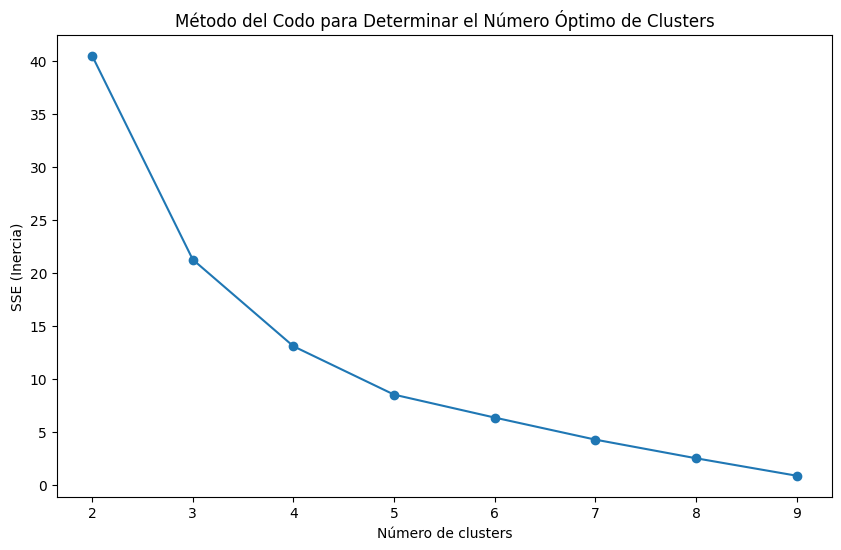

In [ ]:
# Determinar la cantidad óptima de clusters utilizando el método del codo
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features_scaled)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("SSE (Inercia)")
plt.title("Método del Codo para Determinar el Número Óptimo de Clusters")
plt.show()

In [ ]:
# Clustering con KMeans
n_clusters_optimo = 4  # Puedes ajustar este número basado en el gráfico del codo
kmeans = KMeans(n_clusters=n_clusters_optimo, random_state=0)
clusters = kmeans.fit_predict(features_scaled)
features['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Mostrar los resultados de agrupación por cluster
features_grouped = features.groupby('cluster').describe().T

# Aplicar estilo y fondo con gradiente
styled_features_grouped = features_grouped.style.background_gradient(cmap='Blues', axis=1)

# Mostrar los resultados
display(styled_features_grouped)


In [ ]:
features['cluster'] = features['cluster'].replace(0,2)

In [ ]:
# Añadir la columna 'store' para mostrar las tiendas por cluster
features['store'] = features.index

In [ ]:
features

,crecimiento_interanual,cuota_mercado_regional,cuota_mercado_global,NewYear,SuperBowl,Easter,Ramadan starts,Thanksgiving,cluster,store
store,,,,,,,,,,
Greenwich_Village,3.446739,26.981620,11.768056,11263,19353,17929,17933,9062,2,Greenwich_Village
Harlem,4.579859,19.247257,8.394707,8463,12875,13870,12501,5924,1,Harlem
Tribeca,2.098261,39.354385,17.164448,16289,28931,26011,25856,14284,2,Tribeca
Brooklyn,4.752091,14.416738,6.287872,5896,10174,9455,9814,5534,1,Brooklyn
South_End,2.007009,29.664768,8.498082,9452,15350,17187,11955,10334,2,South_End
Roxbury,-1.405766,38.153148,10.929753,12317,19529,18925,16061,11474,2,Roxbury
Back_Bay,5.484397,32.182084,9.219219,9319,16157,13506,13458,8467,2,Back_Bay
Midtown_Village,16.064886,28.897996,8.015687,7287,10796,9545,12079,5830,3,Midtown_Village
Yorktown,11.252359,37.293772,10.344495,8346,15928,10598,14757,6661,3,Yorktown


In [ ]:
features['cluster'].unique()

array([2, 1, 3], dtype=int32)

In [25]:
# Mostrar los resultados de agrupación por cluster
features_grouped = features.groupby('cluster').describe().T

# Aplicar estilo y fondo con gradiente
styled_features_grouped = features_grouped.style.background_gradient(cmap='Blues', axis=1)

# Mostrar los resultados
display(styled_features_grouped)

In [ ]:
len(features[features['cluster']==1])/len(features)*100

60.0

In [ ]:
len(features[features['cluster']==2])/len(features)*100

20.0

In [ ]:
len(features[features['cluster']==3])/len(features)*100

20.0

In [ ]:
# Mostrar las tiendas por cluster
for cluster in range(n_clusters_optimo):
    tiendas_cluster = features[features['cluster'] == cluster]['store']
    print(f"Tiendas en el Cluster {cluster}:")
    print(tiendas_cluster.to_list())
    print("\n")

Tiendas en el Cluster 0:
[]


Tiendas en el Cluster 1:
['Greenwich_Village', 'Tribeca', 'South_End', 'Roxbury', 'Back_Bay', 'Queen_Village']


Tiendas en el Cluster 2:
['Midtown_Village', 'Yorktown']


Tiendas en el Cluster 3:
['Harlem', 'Brooklyn']




In [ ]:
# Guardar los resultados
features.to_csv('/content/drive/MyDrive/Master_DSC_Shared_Folder/DSMarket/Data/df_stores_clusterizados.csv',index=False)
features_grouped.to_csv('features_grouped_by_cluster_completo.csv', index=False)


Informe de Interpretación de Clusters Obtenidos
A continuación se presenta un análisis detallado de los clusters obtenidos, incluyendo las fórmulas utilizadas para calcular cada feature, las tiendas correspondientes a cada cluster y las implicancias estratégicas que estos clusters tienen para la toma de decisiones en la empresa.

Fórmulas Utilizadas en el Cálculo de los Features
Crecimiento Interanual:
Fórmula:
Crecimiento Interanual = ((Ventas Año Actual - Ventas Año Anterior) / Ventas Año Anterior) * 100
Descripción: Esta métrica mide el porcentaje de cambio en las ventas anuales de una tienda de un año al siguiente.
Cuota de Mercado Regional:
Fórmula:
Cuota de Mercado Regional = (Ventas Totales de la Tienda / Ventas Totales de la Región) * 100
Descripción: Representa el porcentaje del total de ventas de la región que corresponde a una tienda en particular.
Cuota de Mercado Global:
Fórmula:
Cuota de Mercado Global = (Ventas Totales de la Tienda / Ventas Totales Globales) * 100
Descripción: Indica el porcentaje de participación de una tienda en las ventas totales de todas las tiendas.
Ventas durante Eventos:
Fórmula:
eventos = df_5_years['event'].dropna().unique()
ventas_eventos = df_5_years[df_5_years['event'].notna()].groupby(['store', 'event'])['daily_sales'].sum().unstack().fillna(0)
ventas_eventos = ventas_eventos.loc[:, eventos]
Descripción: Esta métrica calcula la suma total de ventas durante eventos específicos para cada tienda.
Interpretación de los Clusters Obtenidos
Cluster 1: "Tiendas Consolidadas con Desaceleración" (60% de las tiendas totales)
Tiendas en el Cluster 1:
['Greenwich_Village', ‘South_End', 'Roxbury', 'Back_Bay', 'Queen_Village', 'Tribeca’]
Crecimiento Interanual: -4.70% (decrecimiento)
Estas tiendas están experimentando un decrecimiento en sus ventas interanuales, lo que sugiere una desaceleración en su rendimiento.
Cuota de Mercado Regional: 33.55%
A pesar del decrecimiento, estas tiendas tienen una participación de mercado regional bastante significativa, lo que indica que siguen siendo jugadores importantes en su región.
Cuota de Mercado Global: 11.22%
Estas tiendas representan una parte importante del mercado global.
Comportamiento en Eventos: Ventas altas durante eventos como SuperBowl, Easter, y Thanksgiving.
Implicancia Estratégica:

Riesgo de Estancamiento: Es crucial que la empresa implemente estrategias de revitalización para evitar que estas tiendas pierdan cuota de mercado.
Implementación de Pilotos de Innovación: Estas tiendas podrían ser una buena opción para implementar pilotos de nuevas estrategias de marketing o modelos de predicción de demanda, con el objetivo de revertir la tendencia negativa.
Cluster 2: "Tiendas Emergentes" (20% de las tiendas totales.)
Tiendas en el Cluster 2:
['Midtown_Village', 'Yorktown']
Crecimiento Interanual: 8.05% (crecimiento)
Estas tiendas están experimentando un crecimiento interanual positivo, lo que indica un rendimiento en ascenso.
Cuota de Mercado Regional: 32.26%
Tienen una participación regional sólida similar a las tiendas del cluster 0.
Cuota de Mercado Global: 8.89%
Representan una parte significativa del mercado global, aunque algo menor que en otros clusters.
Comportamiento en Eventos: Ventas moderadas durante eventos, aunque menores que en los clusters 0 y 1.
Implicancia Estratégica:

Foco en Expansión: Estas tiendas están en crecimiento, por lo que podrían beneficiarse de estrategias que las ayuden a consolidar y expandir su cuota de mercado.
Pruebas de Nuevos Modelos: Su crecimiento las hace candidatas ideales para probar nuevos modelos predictivos de demanda en un entorno menos riesgoso, y si tienen éxito, escalar estas prácticas a otros clusters.
Cluster 3: "Tiendas Rezagadas" (20% de las tiendas totales.)
Tiendas en el Cluster 3:
['Harlem', 'Brooklyn']
Crecimiento Interanual: -2.32% (decrecimiento)
Estas tiendas han visto una ligera disminución en el crecimiento interanual.
Cuota de Mercado Regional: 17.07%
Este cluster tiene la menor participación de mercado regional entre todos los clusters.
Cuota de Mercado Global: 7.45%
También representa la menor participación en el mercado global.
Comportamiento en Eventos: Ventas más bajas durante los eventos comparado con otros clusters.
Implicancia Estratégica:

Reestructuración Necesaria: Estas tiendas tienen el rendimiento más bajo tanto en crecimiento como en participación de mercado. Se recomienda realizar un análisis profundo para identificar las causas y considerar reestructuración o cambio de estrategia.
Prueba de Conceptos de Recuperación: Dado su bajo rendimiento, estas tiendas podrían utilizarse para pruebas de conceptos orientados a la recuperación, como promociones agresivas o nuevos enfoques de marketing.
Conclusión
Cada cluster tiene implicancias estratégicas específicas:

Cluster 1: "Tiendas Consolidada con Desaceleración" - Necesitan revitalización para evitar la pérdida de cuota de mercado.
Cluster 2: "Tiendas Emergentes" - Enfocarse en la expansión y consolidación de mercado.
Cluster 3: "Tiendas Rezagadas" - Necesitan reestructuración o estrategias de recuperación.
Este análisis, ahora con las tiendas asociadas a cada cluster, proporciona una base sólida para la toma de decisiones estratégicas, como dónde implementar un piloto de un modelo de predicción de demanda, optimizando recursos y maximizando el impacto de las decisiones empresariales.